In [21]:
import numpy as np
from polara.recommender.data import RecommenderData
from polara.recommender.models import RecommenderModel
from polara.tools.movielens import get_movielens_data

# Get Movielens1M data

In [3]:
data = get_movielens_data(get_genres=True)

In [4]:
data, genres = data

In [5]:
data.head()

,userid,movieid,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [6]:
genres.head()

,movieid,movienm,genreid
0,1,Toy Story (1995),Animation
1,1,Toy Story (1995),Children's
2,1,Toy Story (1995),Comedy
3,2,Jumanji (1995),Adventure
4,2,Jumanji (1995),Children's


In [7]:
%matplotlib inline

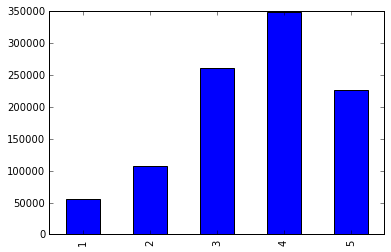

In [8]:
data.rating.value_counts().sort_index().plot.bar()

In [9]:
data_model = RecommenderData(data, 'userid', 'movieid', 'rating')

In [10]:
data_model.get_configuration()

{'holdout_size': 3,
 'negative_prediction': False,
 'permute_tops': False,
 'random_holdout': False,
 'shuffle_data': False,
 'test_fold': 5,
 'test_ratio': 0.2,
 'test_sample': None}

In [11]:
data_model.prepare()

Preparing data
27 unseen items filtered from testset.


In [13]:
data_model.training.head()

,userid,movieid,rating
0,0,1099,5
1,0,634,3
2,0,848,3
3,0,3161,4
4,0,2153,5


In [14]:
data_model.test.testset.head()

,userid,movieid,rating
807459,0,577,4
807517,0,2153,5
807516,0,1290,4
807515,0,1283,4
807514,0,1270,3


In [15]:
data_model.test.evalset.head()

,userid,movieid,rating
807458,0,575,5
807460,0,1881,5
807464,0,846,5
807546,1,1878,5
807549,1,576,5


In [22]:
class TopMovies(RecommenderModel):
    def build(self):
        self._recommendations = None
        itemid = self.data.fields.itemid
        item_scores = self.data.training[itemid].value_counts().sort_index().values
        self.item_scores = item_scores
        
        
    def get_recommendations(self):
        userid = self.data.fields.userid
        num_users = self.data.test.testset[userid].max() + 1
        
        scores = np.repeat(self.item_scores[None, :], num_users, axis=0)
        
        top_recs = self.get_topk_items(scores)
        return top_recs
        

In [23]:
top = TopMovies(data_model)

In [24]:
top.build()

In [27]:
recs = top.get_recommendations()

In [29]:
np.savez('baseline', recs=recs)

In [30]:
recs

array([[2638,  252, 1101, ..., 2363,  575, 1443],
       [2638,  252, 1101, ..., 2363,  575, 1443],
       [2638,  252, 1101, ..., 2363,  575, 1443],
       ..., 
       [2638,  252, 1101, ..., 2363,  575, 1443],
       [2638,  252, 1101, ..., 2363,  575, 1443],
       [2638,  252, 1101, ..., 2363,  575, 1443]], dtype=int64)

In [31]:
top.evaluate()

Hits(true_positive=548, true_negative=0, false_positive=0, false_negative=3076)